<h1><strong>Alterção dos Pesos Sinápticos da Rede Neural Artificial</strong></h1>

<h3>Importação das Bibliotecas</h3>

In [57]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import random

print(tf.__version__)

2.4.1


<h3>Carregando o Dataset</h3>

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


<h3>Estudo do Dataset</h3>

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
train_labels.min()

0

In [12]:
train_labels.max()

9

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

In [15]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [16]:
test_labels.min()

0

In [17]:
test_labels.max()

9

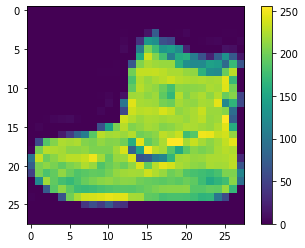

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

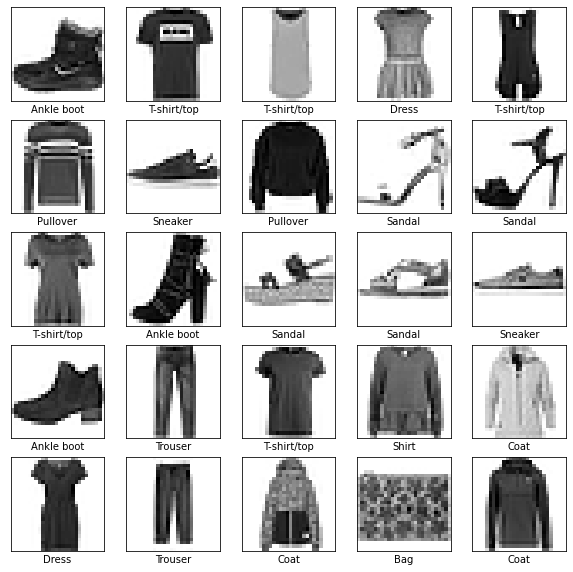

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

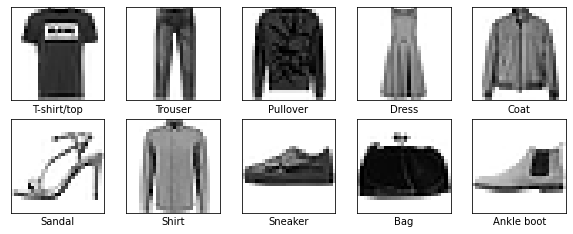

In [21]:
j = 0

plt.figure(figsize=(10,10))
for i in range(10):
    while train_labels[j] != i:
        j += 1
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[j], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[j]])
plt.show()

<h3>Inicialização da Rede Neural Artificial</h3>

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h3>Treinamento da Rede Neural Artificial</h3>

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6318 - accuracy: 0.7798
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3794 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3437 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3083 - accuracy: 0.8885
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2926 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2806 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2605 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2447 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.233

<h3>Validação da Rede Neural Artificial</h3>

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3483 - accuracy: 0.8824

Test accuracy: 0.8823999762535095


In [26]:
predictions = model.predict(test_images)

In [27]:
predictions[0]

array([1.68714934e-07, 1.45829671e-09, 9.15151954e-09, 5.93574703e-11,
       1.11990195e-08, 1.22349884e-04, 1.92137918e-07, 8.52552056e-03,
       3.50351370e-09, 9.91351724e-01], dtype=float32)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

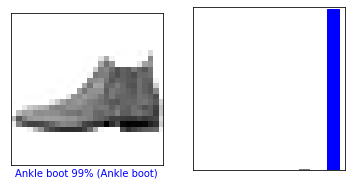

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

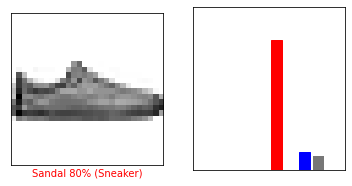

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

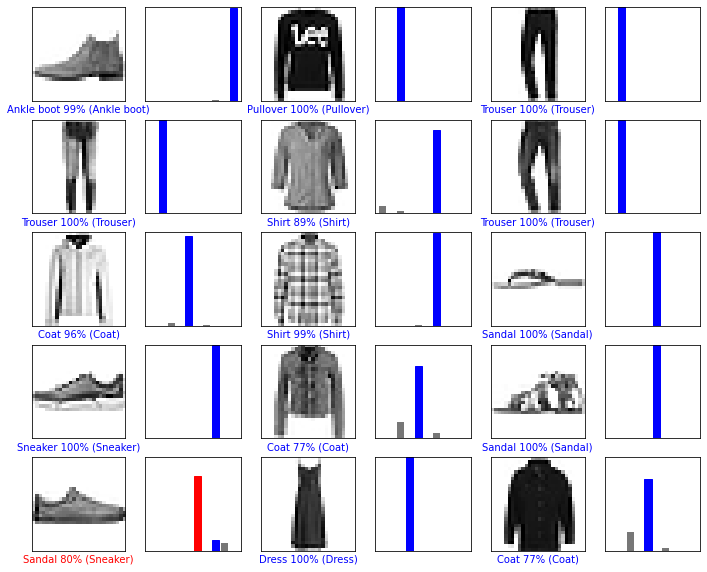

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [112]:
img = test_images[0]

print(img.shape)

(28, 28)


In [35]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.6871444e-07 1.4582912e-09 9.1515195e-09 5.9357012e-11 1.1198998e-08
  1.2234977e-04 1.9213773e-07 8.5255159e-03 3.5035073e-09 9.9135172e-01]]


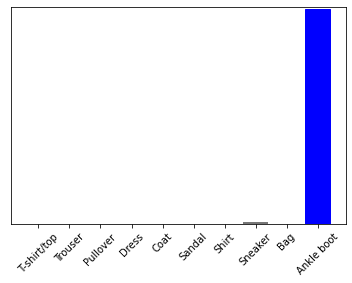

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

9

<h3>Alteração dos Pesos Sinápticos da Rede Neural Artificial</h3>

In [70]:
modelChanged = model

In [105]:
for i in range(len(modelChanged.trainable_weights)):
    modelChanged.trainable_weights[i].assign(np.random.random_sample(modelChanged.trainable_weights[i].shape))

<h3>Validação da Rede Neural Artificial com os Pesos Sinápticos Alterados</h3>

In [109]:
test_loss, test_acc = modelChanged.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 333.9462 - accuracy: 0.1000

Test accuracy: 0.10000000149011612


In [110]:
predictionsChanged = model.predict(test_images)

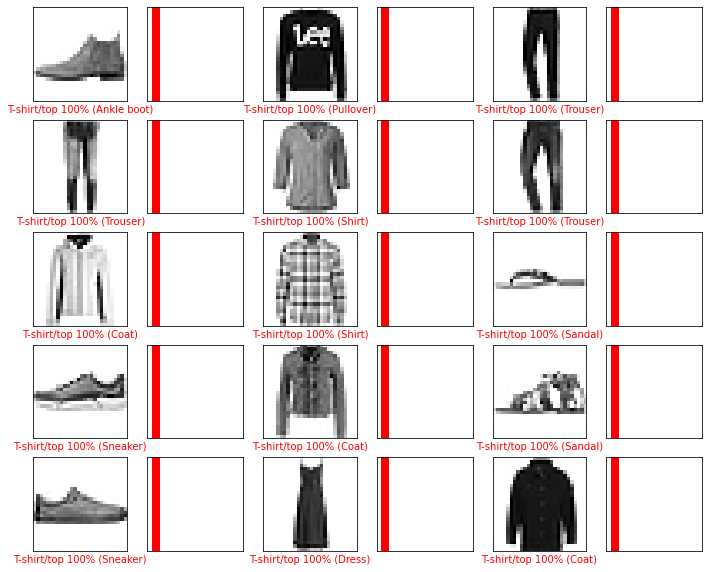

In [111]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictionsChanged, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictionsChanged, test_labels)
plt.show()